In [14]:
import numpy as np
import src.utils as utils
import sempler

In [15]:
directory = "synthetic_experiments/dataset_1656402630_runs:1_seed:42_G:6_k:2.7_p:5_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:3_i_type:noise_i_size:1_i_v_min:5_i_v_max:10_n:1000/"
directory = "synthetic_experiments/dataset_1656413704_runs:1_seed:42_G:1_k:2.7_p:5_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:3_i_type:noise_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000/"

In [16]:
_, gnies_results = utils.read_pickle(directory + "compiled_results_gnies.pickle")
ground_truth, computed_metrics = utils.read_pickle(directory + "metrics.pickle")

In [13]:
gnies_results['estimates'][0]

array([[[array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1],
       [0, 1, 1, 0, 0]])],
        [array([[0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0]])],
        [array([[0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0]])]],

       [[array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0]])],
        [array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0]])],
        [array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0]])]],

       [[array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0]])],
        [array([[0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 0

In [66]:
case_no = 0

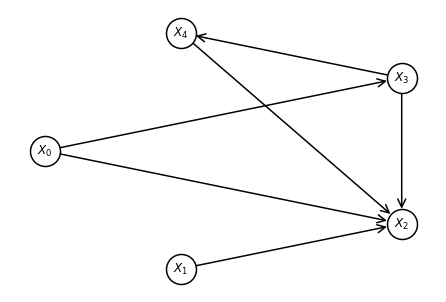

In [67]:
sempler.utils.plot_graph(ground_truth['dags'][case_no])

In [68]:
computed_metrics['gnies']

{<function src.metrics.type_1_structc(estimated_class, true_class)>: array([[[[0.33333333],
          [0.4       ],
          [0.4       ]],
 
         [[0.25      ],
          [0.25      ],
          [0.33333333]],
 
         [[0.25      ],
          [0.44444444],
          [0.14285714]]]]),
 <function src.metrics.type_2_structc(estimated_class, true_class)>: array([[[[0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.16666667],
          [0.        ]]]]),
 <function src.metrics.type_1_skeleton(estimate, truth)>: array([[[[0.33333333],
          [0.4       ],
          [0.4       ]],
 
         [[0.25      ],
          [0.25      ],
          [0.33333333]],
 
         [[0.25      ],
          [0.33333333],
          [0.14285714]]]]),
 <function src.metrics.type_1_I(estimate, truth)>: array([[[[0.4 ],
          [0.4 ],
          [0.4 ]],
 
         [[0.4 ],
    

### DAGs

False


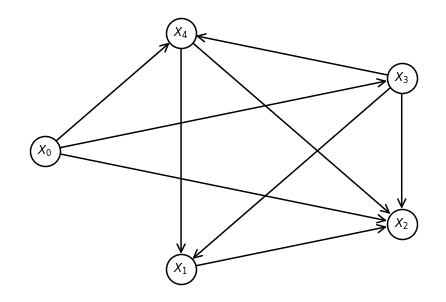

False


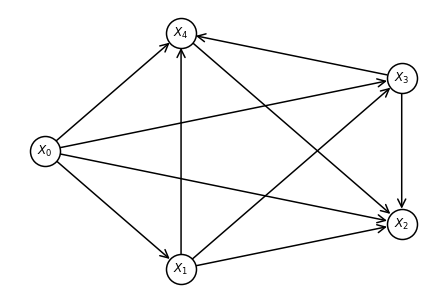

False


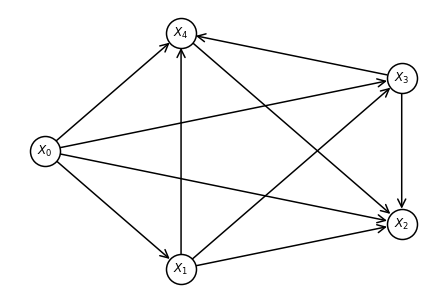

False


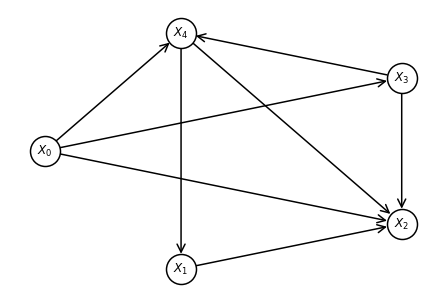

False


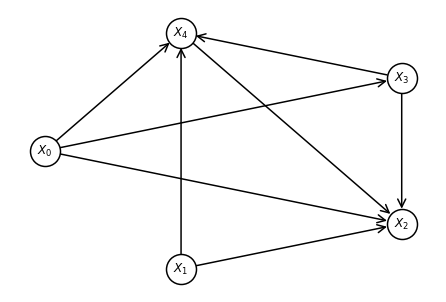

False


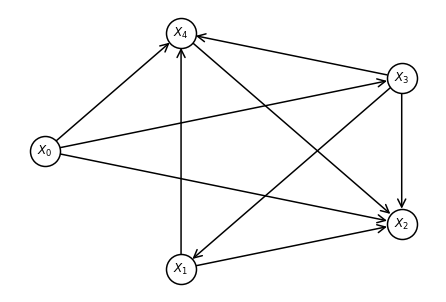

False


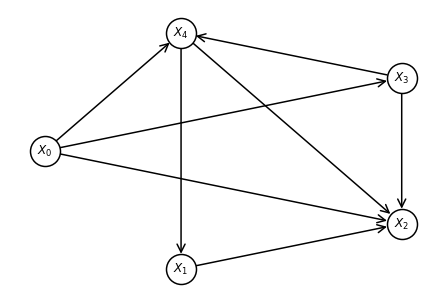

False


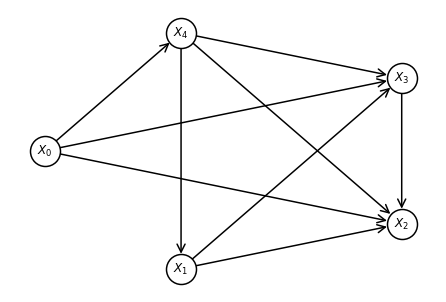

False


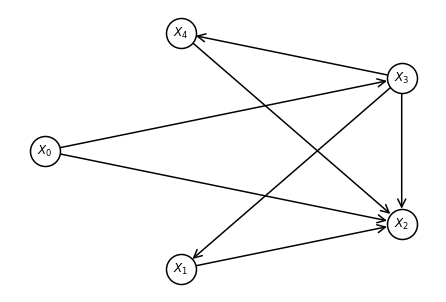

In [69]:
for estimate in gnies_results['estimates'][case_no].flatten():
    print((estimate == ground_truth['dags'][case_no]).all())
    sempler.utils.plot_graph(estimate)

## Intervention targets

In [60]:
case_no = 0
for estimate in gnies_results['I_estimates'][case_no].flatten():
    truth = ground_truth['Is'][case_no]
    print(estimate, "vs.", truth, estimate == truth)    

{0, 2, 4} vs. {0, 2, 4} True
{0, 2, 4} vs. {0, 2, 4} True
{0, 2, 4} vs. {0, 2, 4} True
